In [13]:
import sys
sys.path.append('C:\\Users\\xpy\\work\\strategies2py\\AprilQuant')
from collections import defaultdict, OrderedDict
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import empyrical

from backtest.return_rate_calculations import (
    cal_avg_cum_ret, 
    avg_cum_ret_from_cursor, 
    cal_ret, 
    cum_ret_from_doc,
    avg_annual_ret
)
from utils import query, plot_curves
from consts import C_DAILY

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 


DB = 'DMAC'
break_in_rng = (0, 0.1, 0.2)

# 策略整体表现
使用复权价格/真实价格产生交易信号

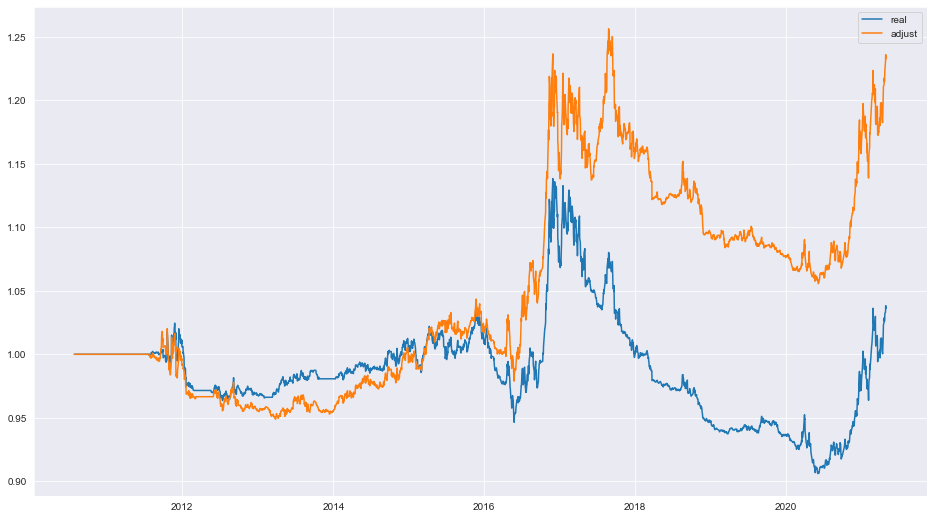

In [2]:
break_in = 0.1
cursor_real = query(db_name=DB, col='daily',  break_in=break_in, use_real_price=True)
cum_ret_real = avg_cum_ret_from_cursor(cursor_real) 

cursor_adjust = query(db_name=DB, col='daily',  break_in=break_in, use_real_price=False)
cum_ret_adjust = avg_cum_ret_from_cursor(cursor_adjust)

plot_curves([cum_ret_real, cum_ret_adjust], '', ['real', 'adjust'])

# 策略在各品种上的表现

d:\python\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


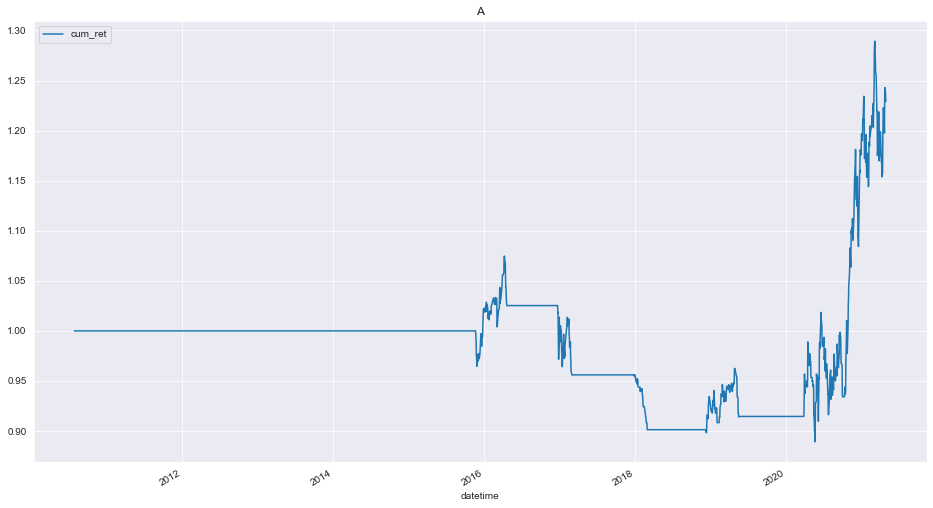

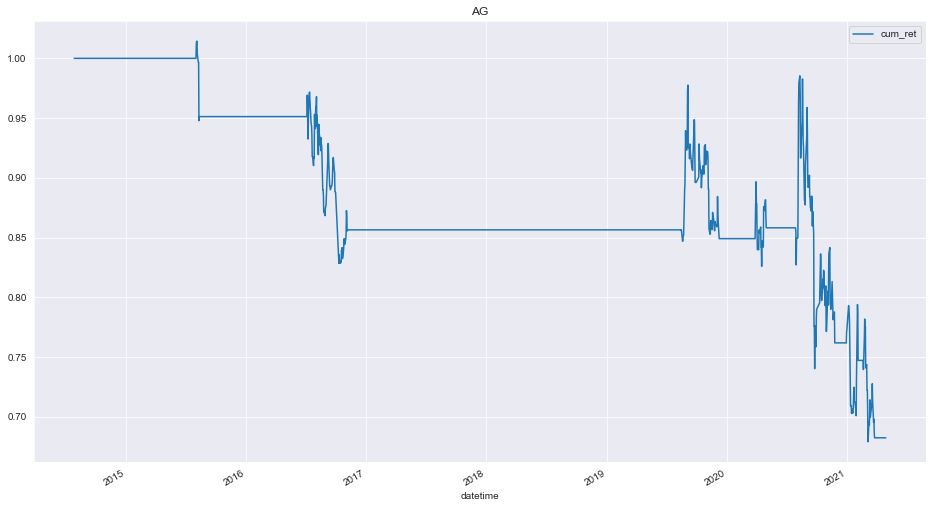

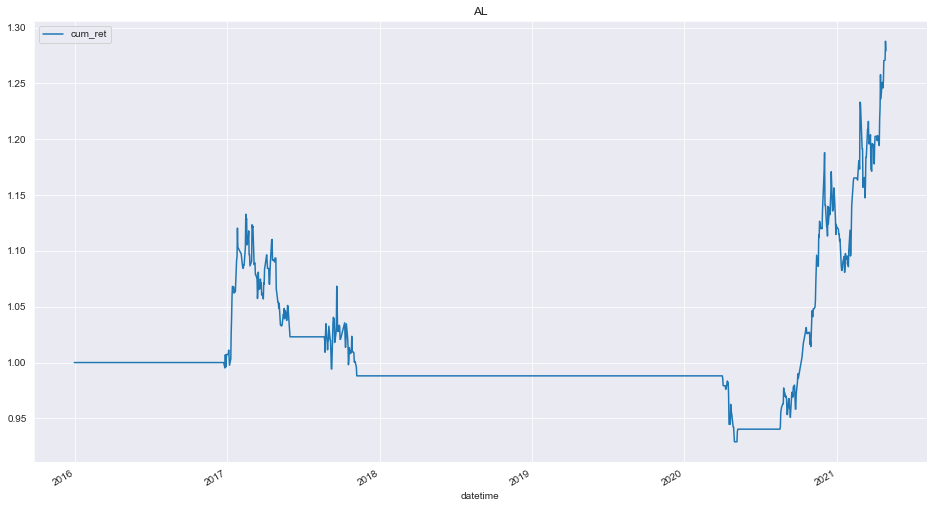

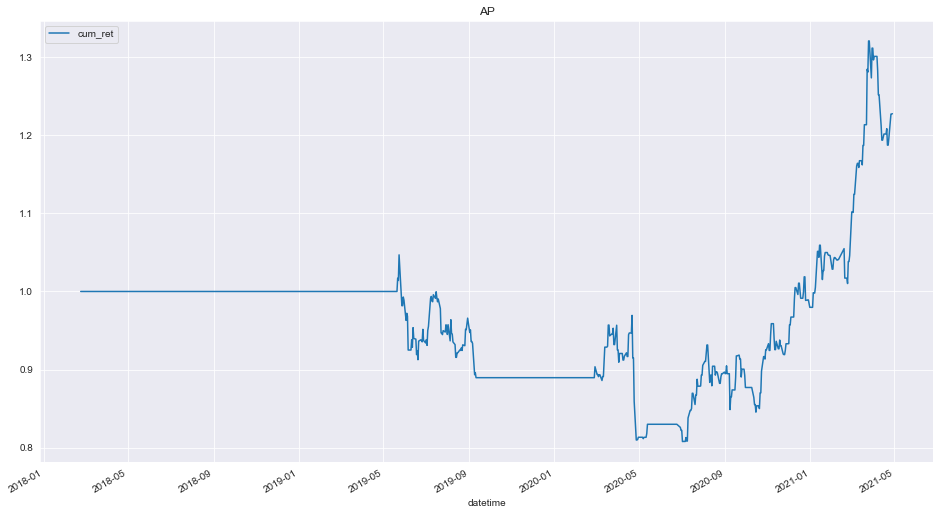

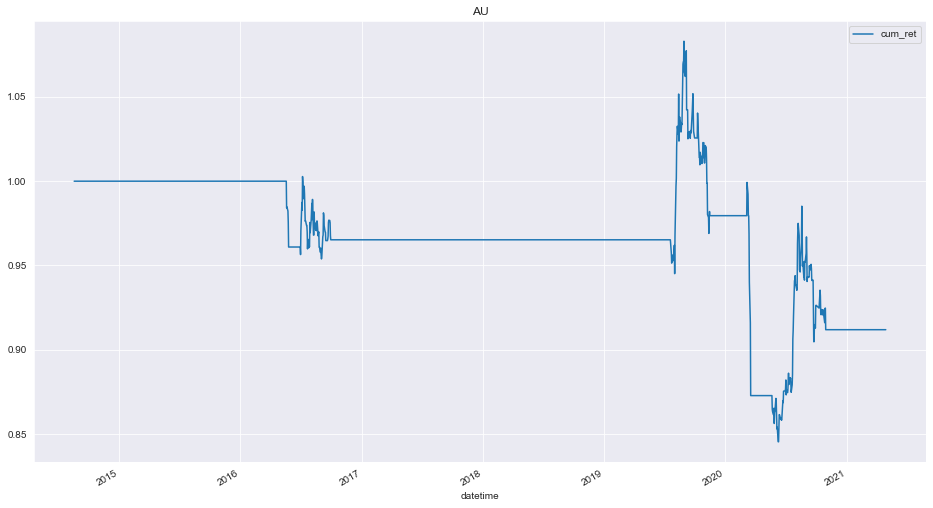

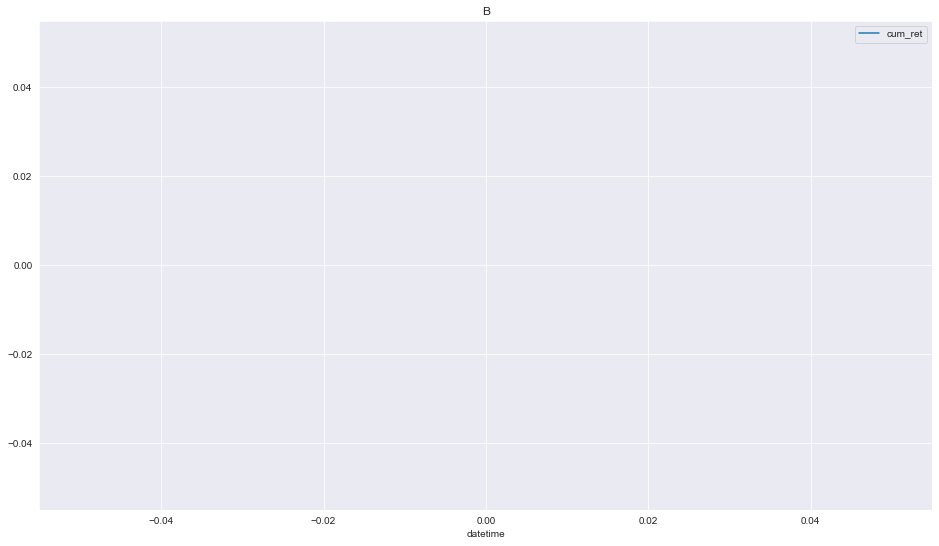

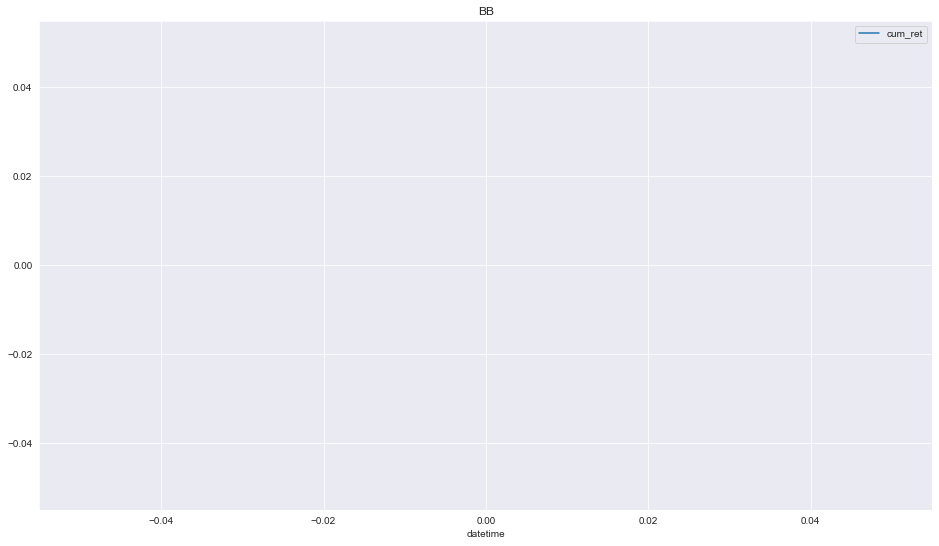

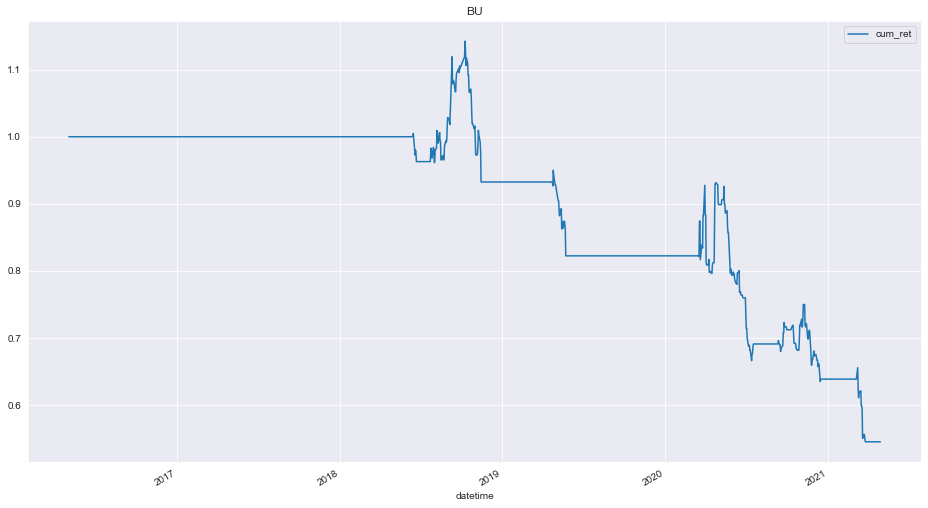

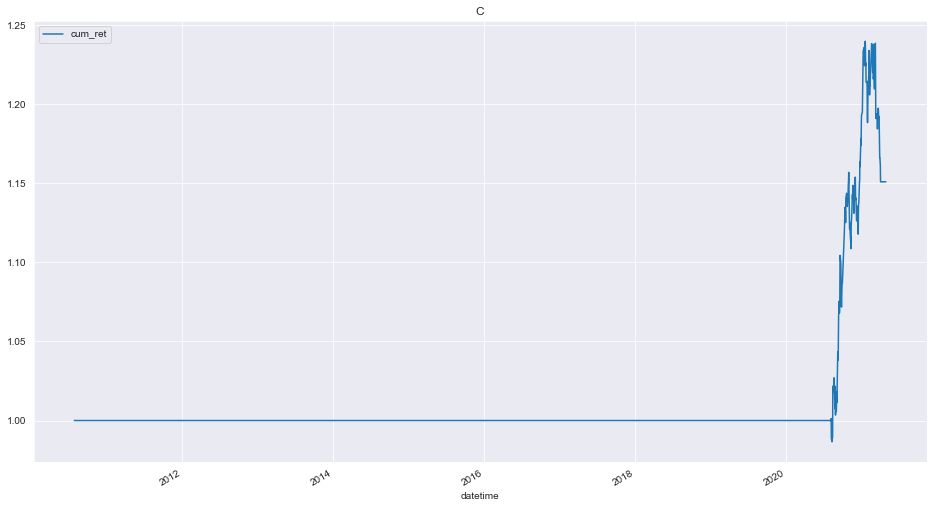

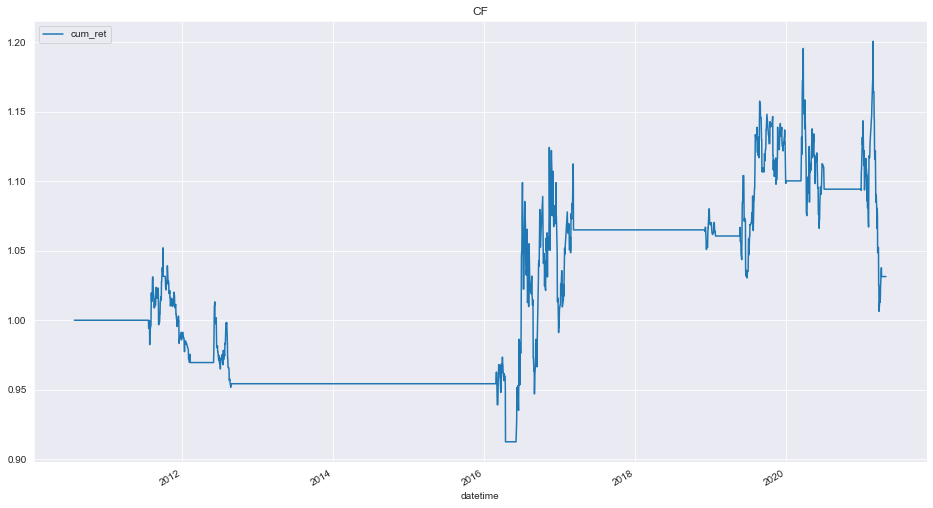

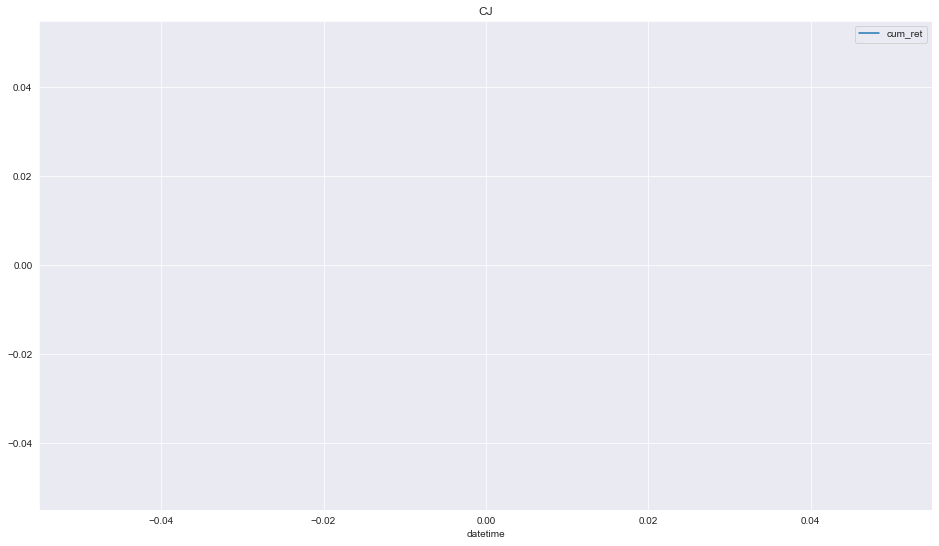

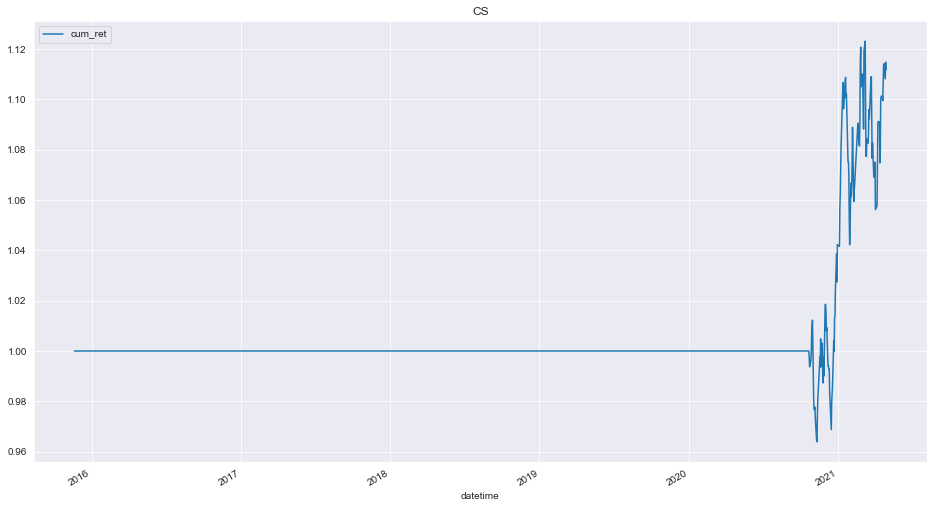

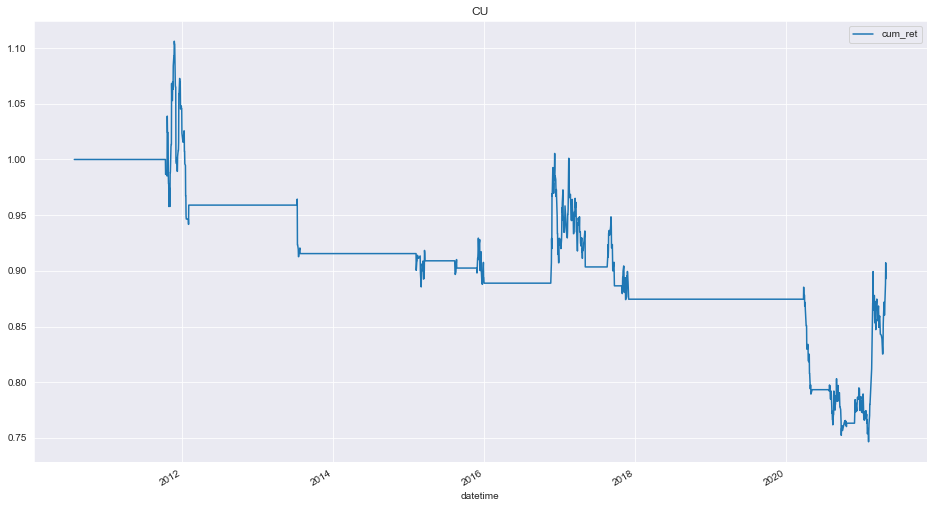

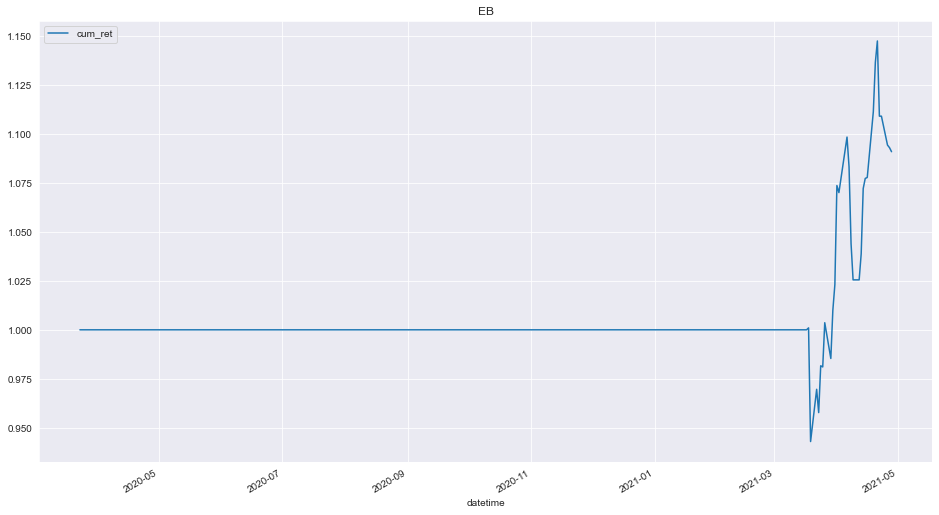

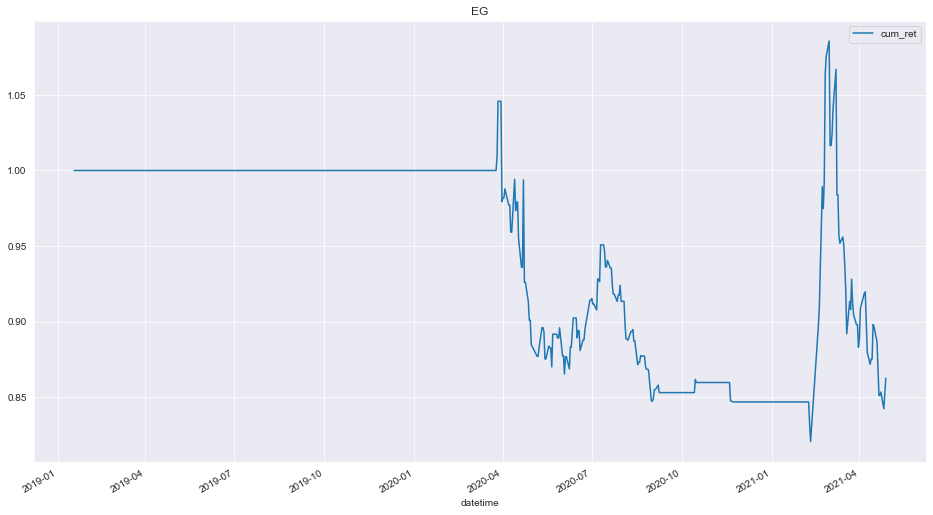

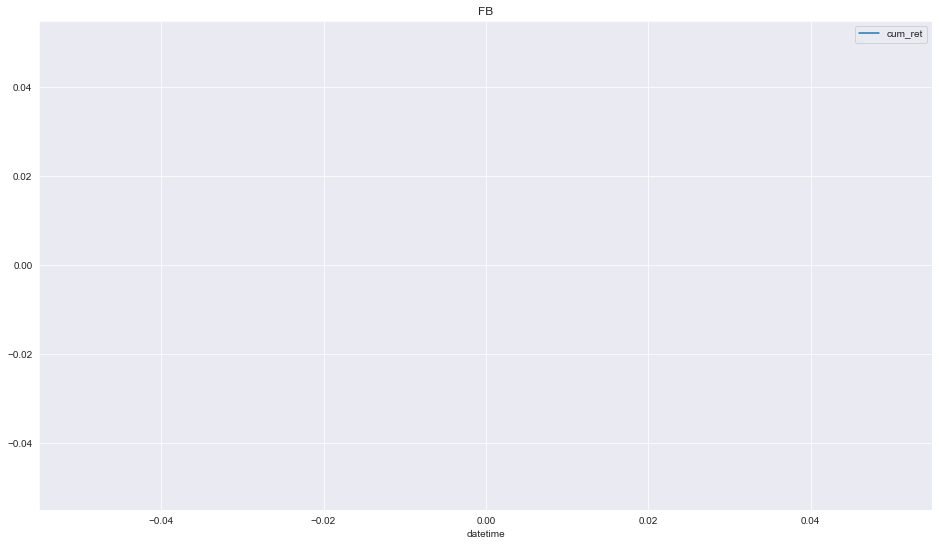

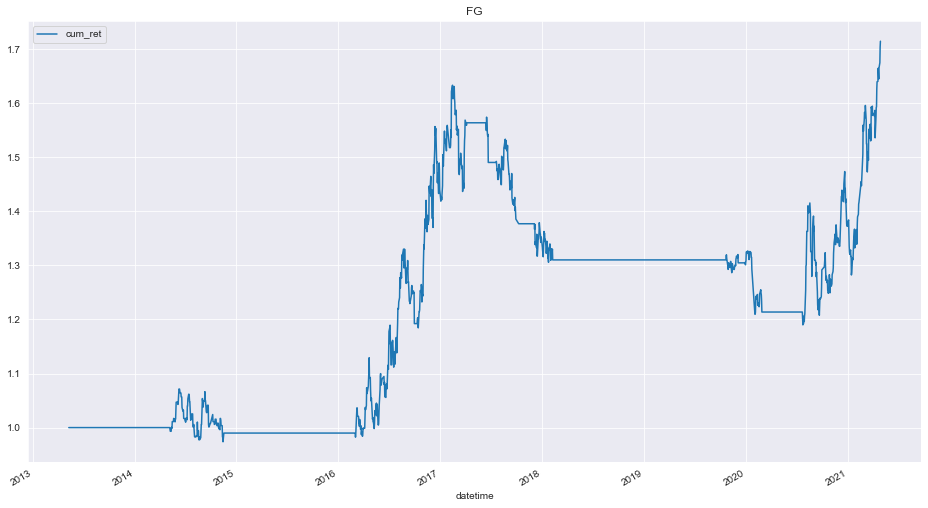

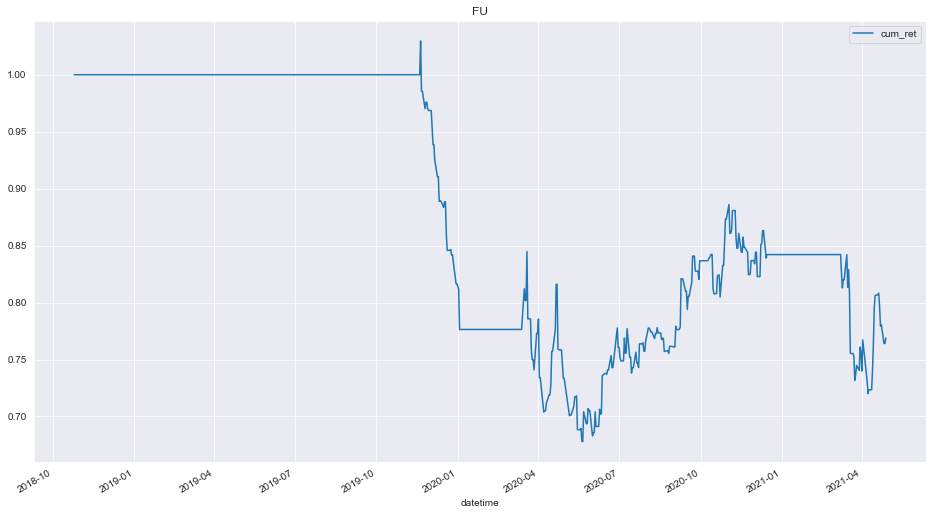

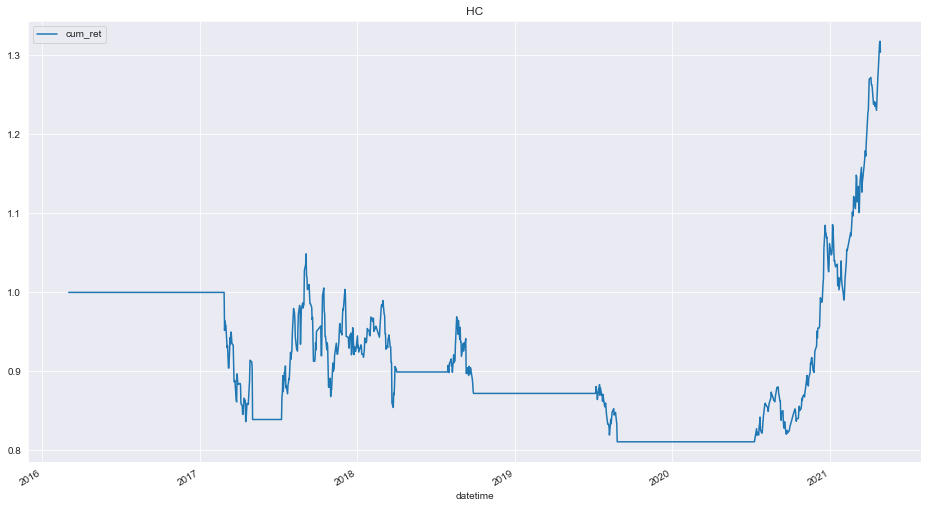

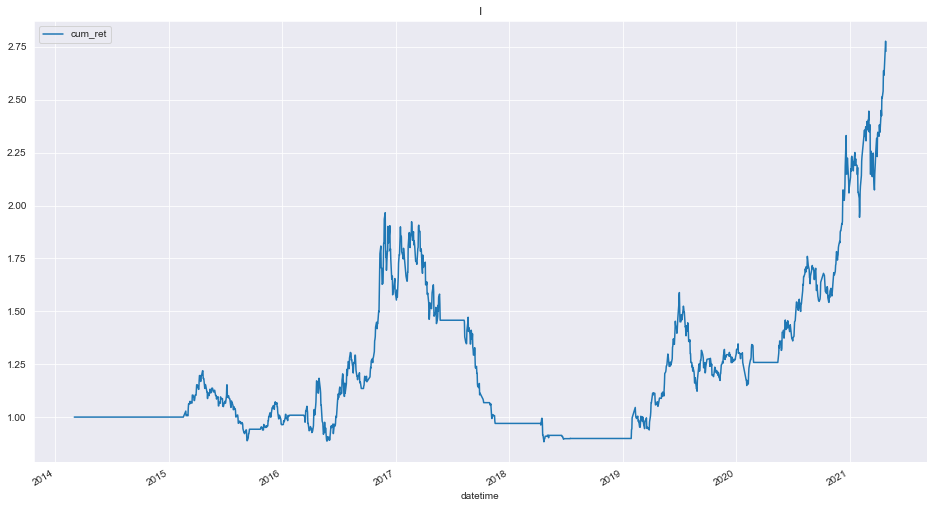

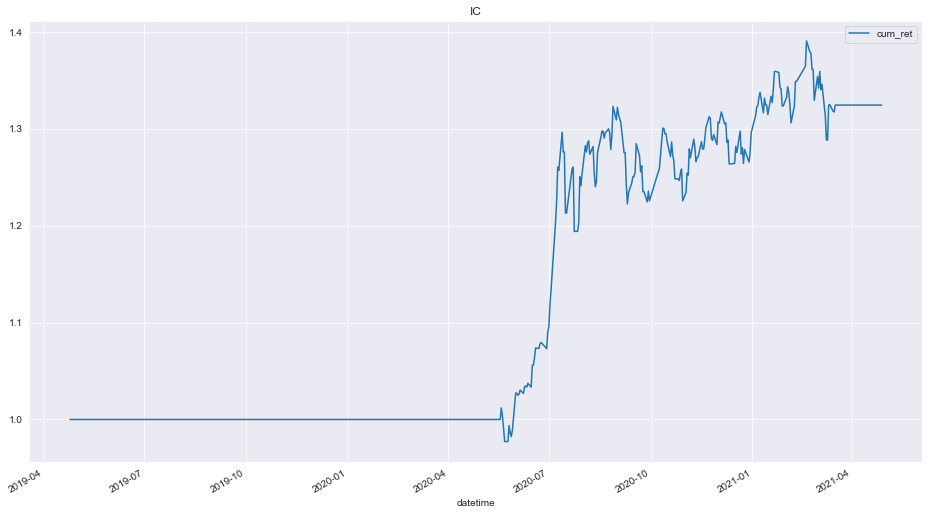

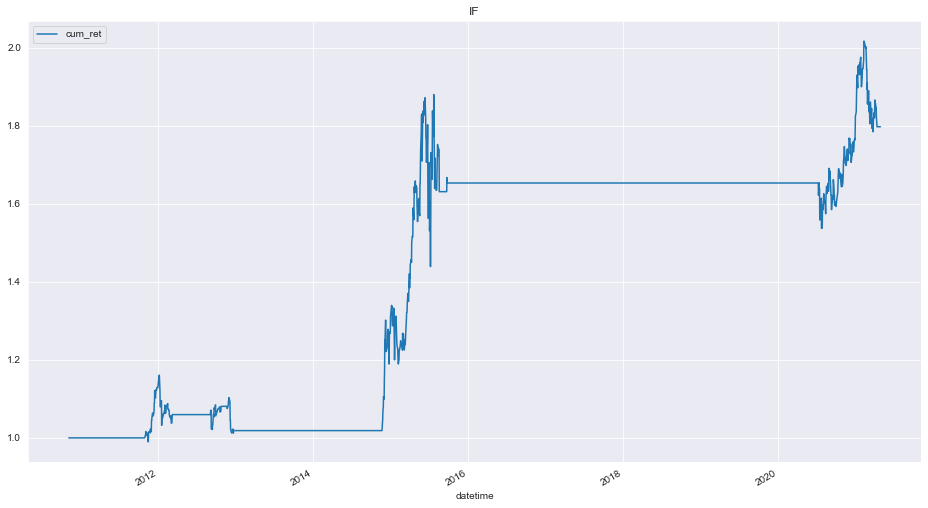

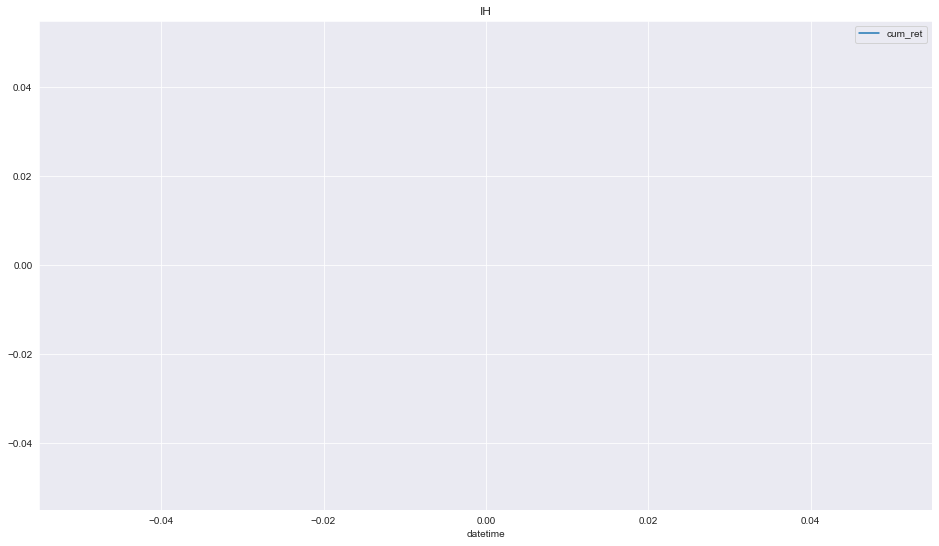

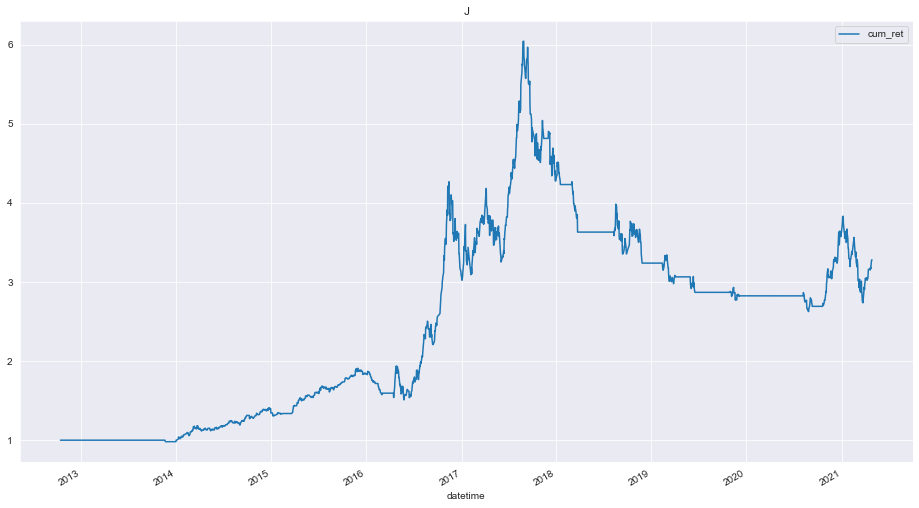

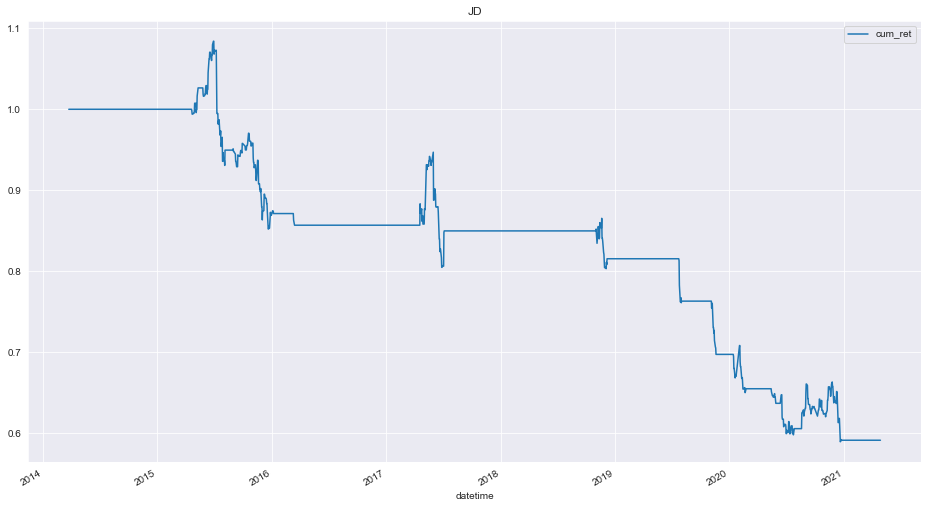

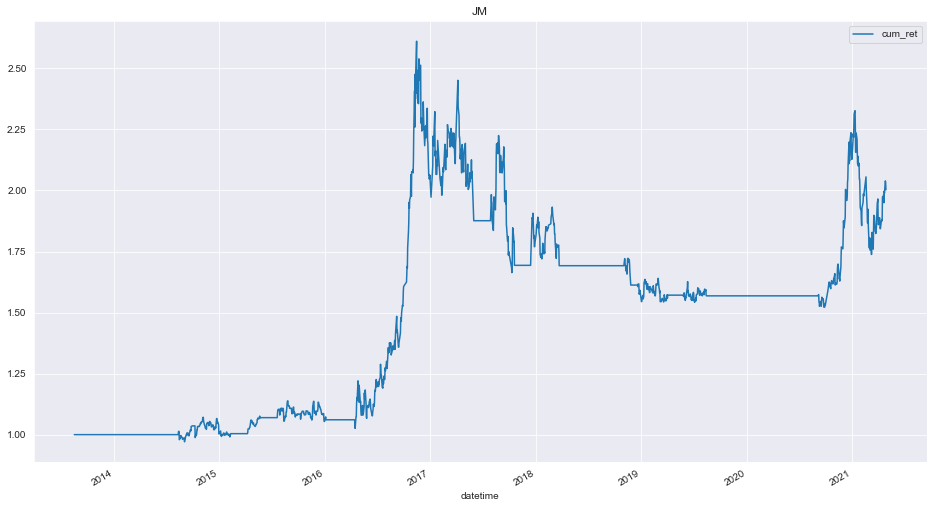

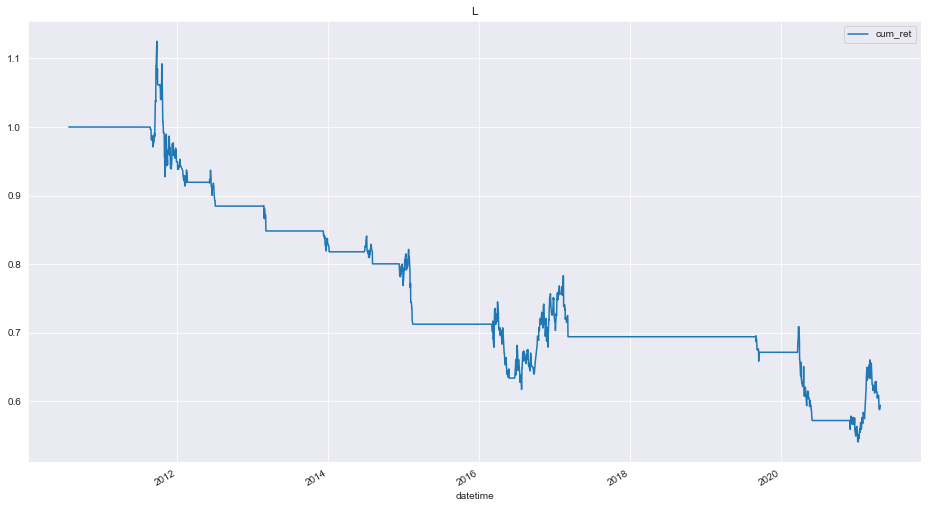

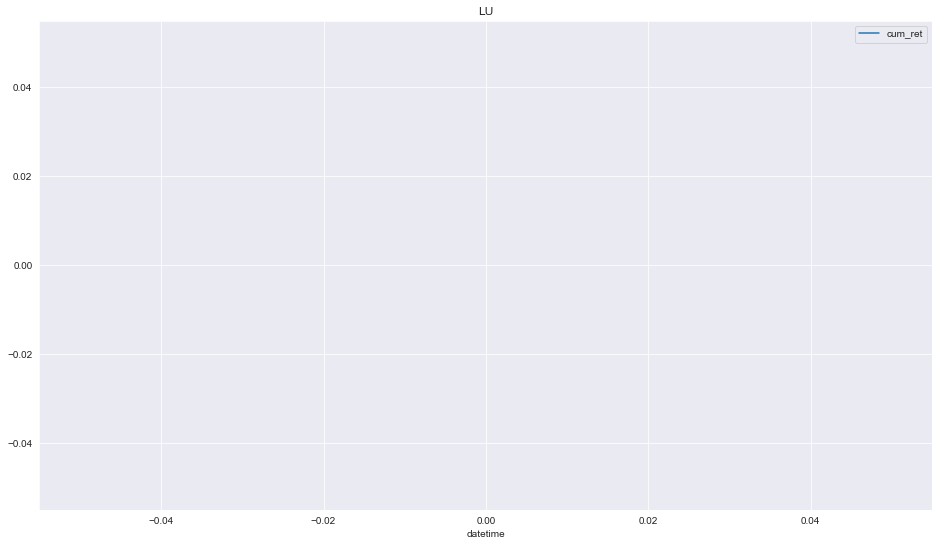

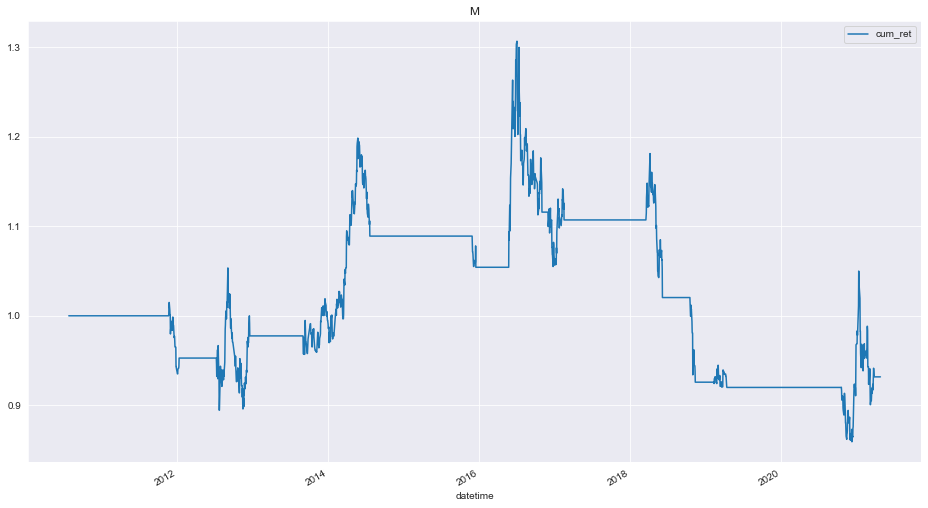

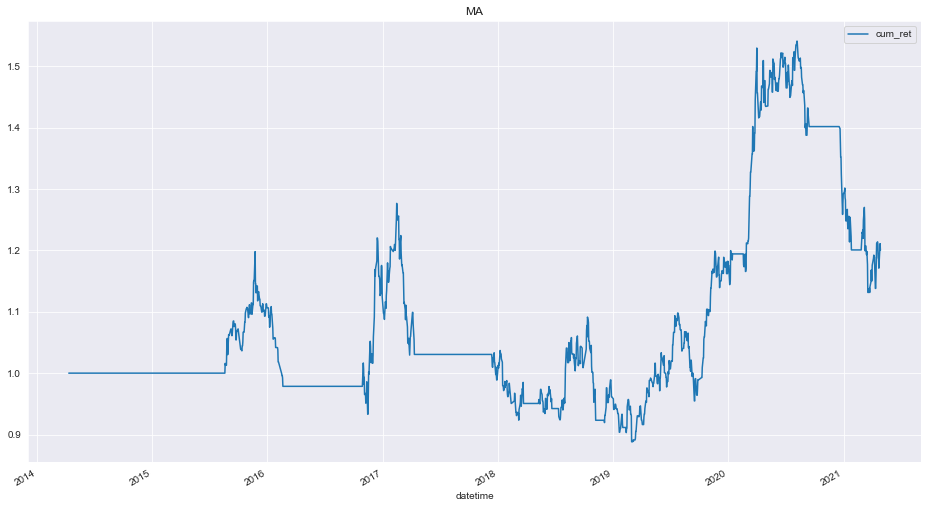

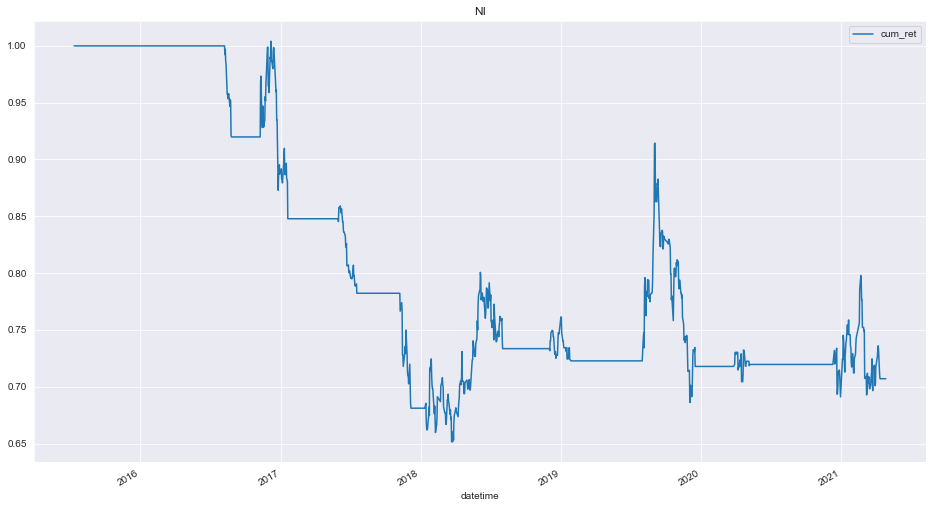

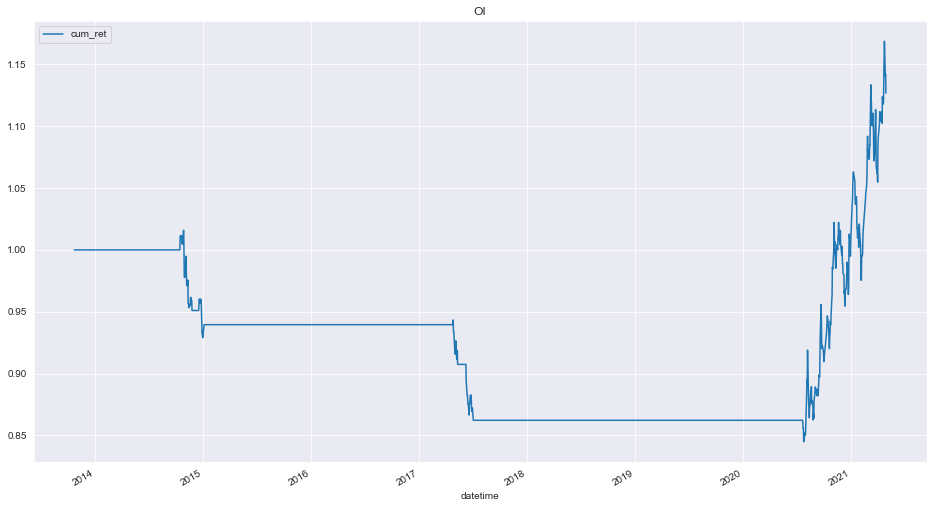

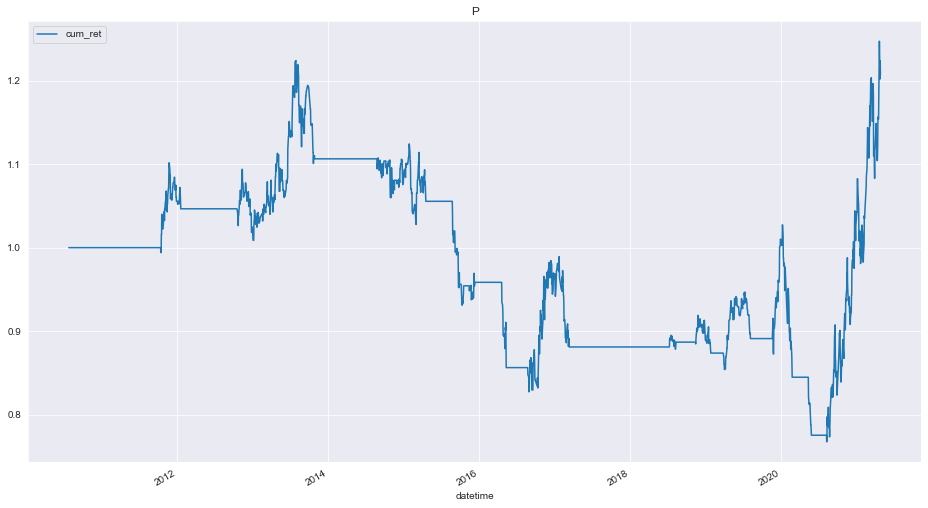

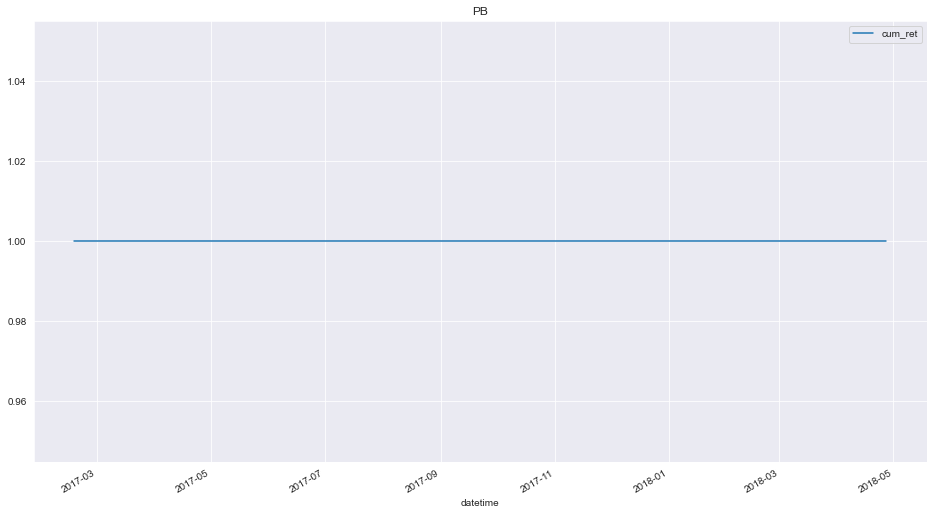

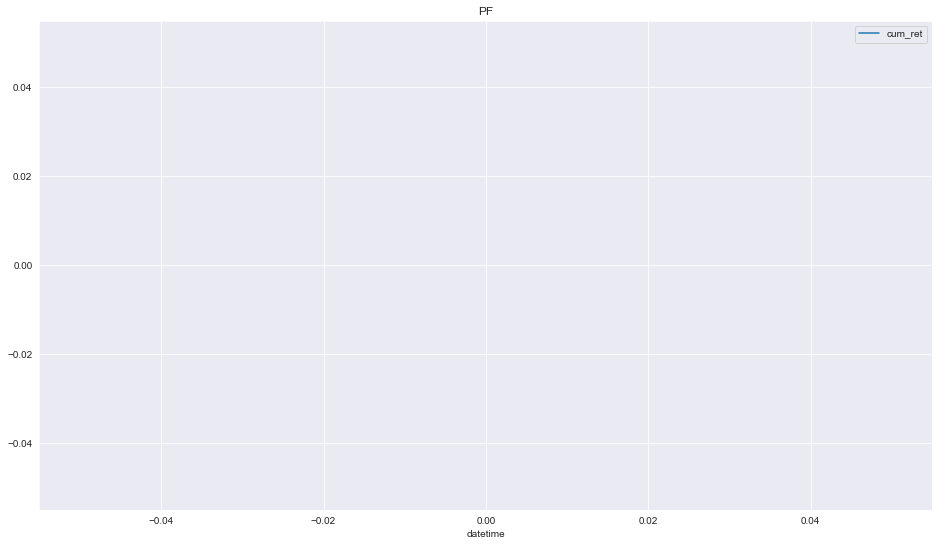

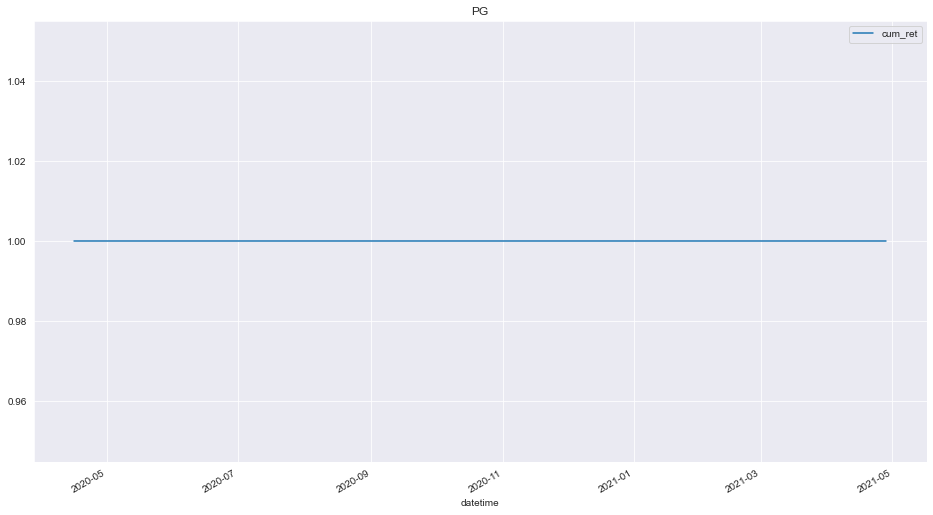

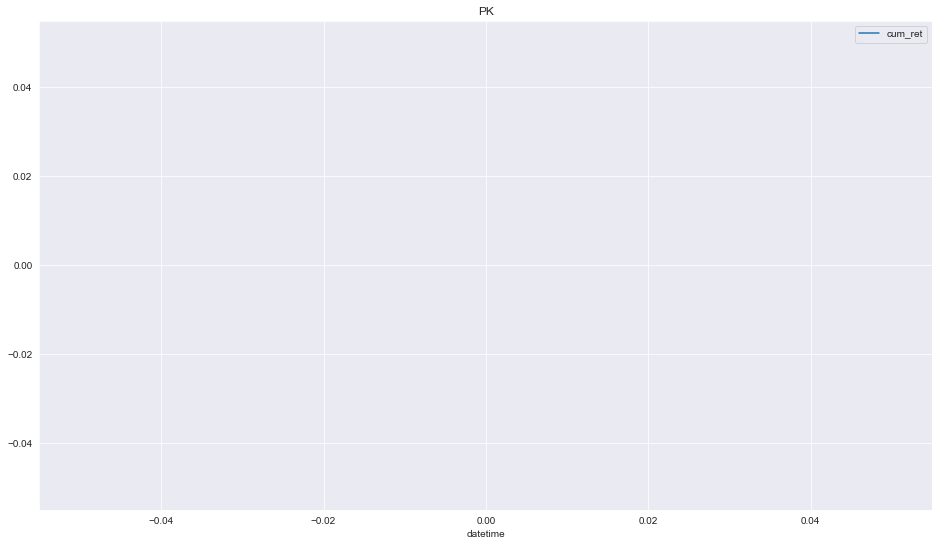

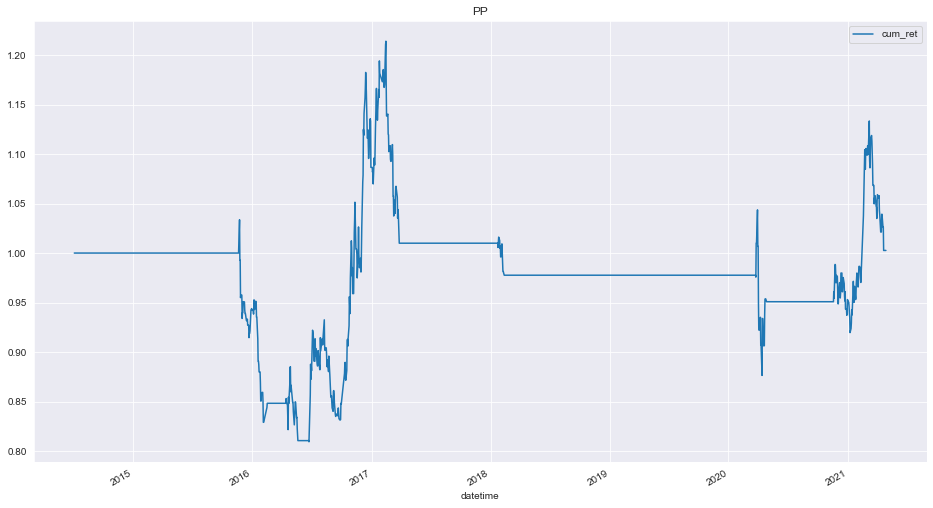

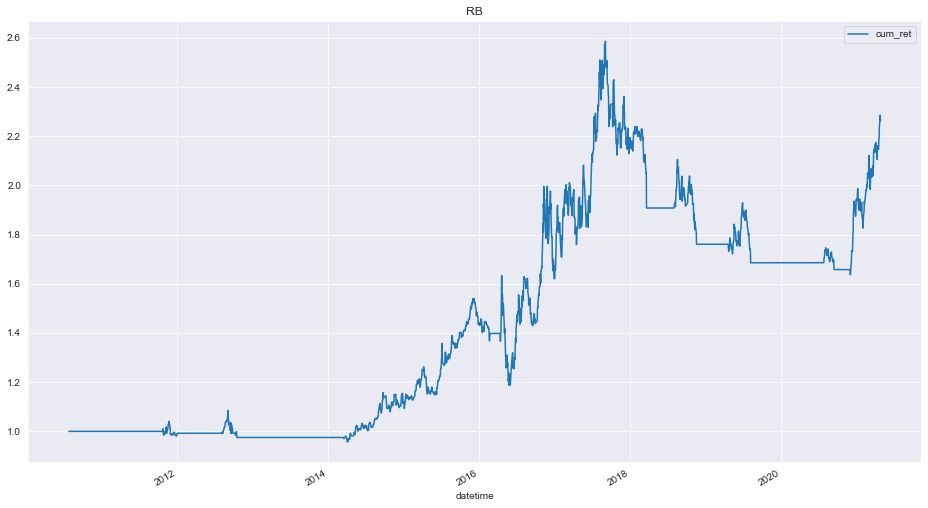

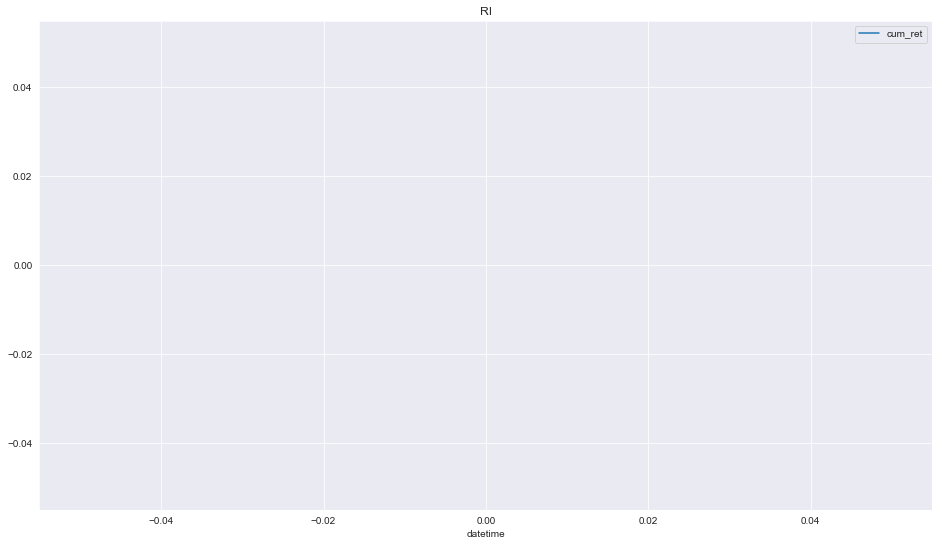

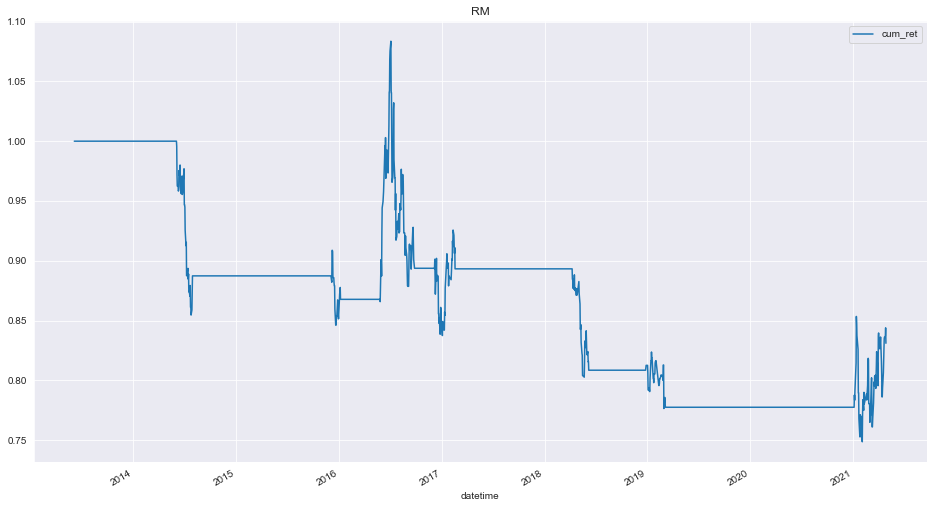

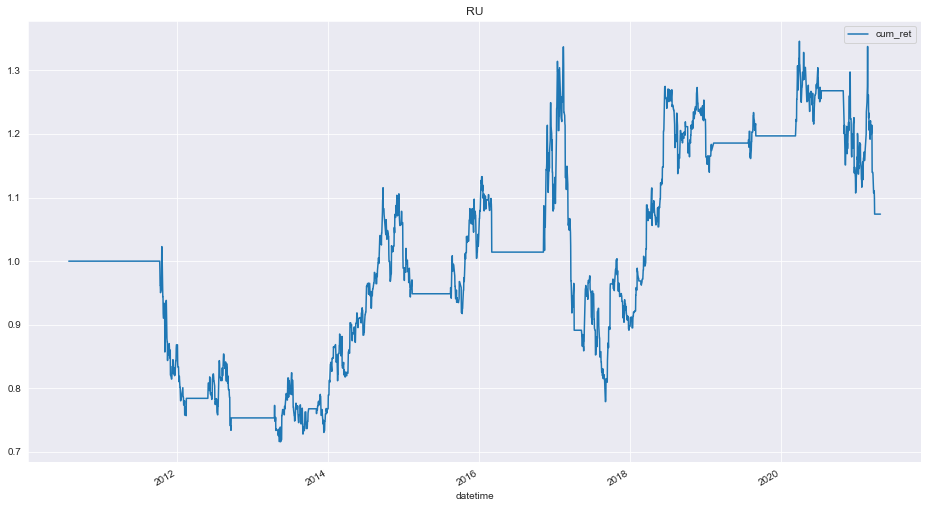

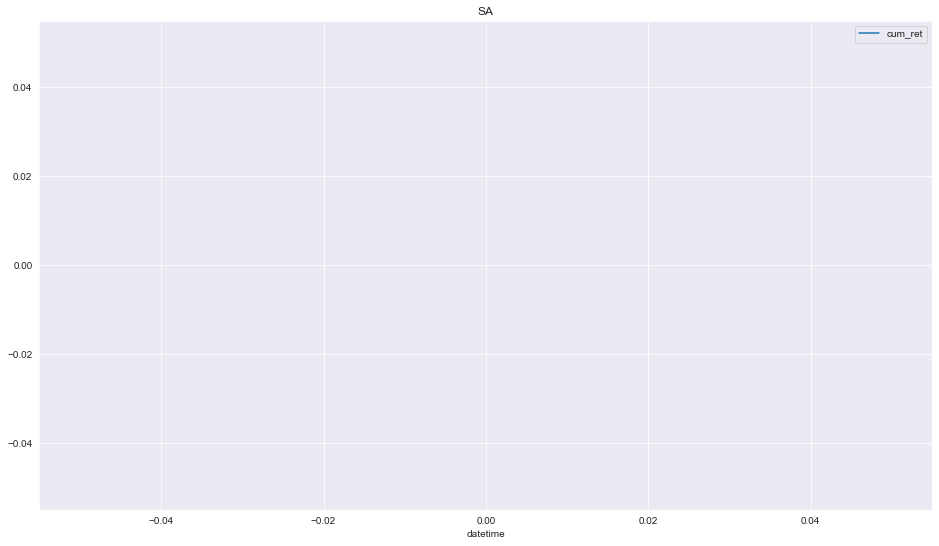

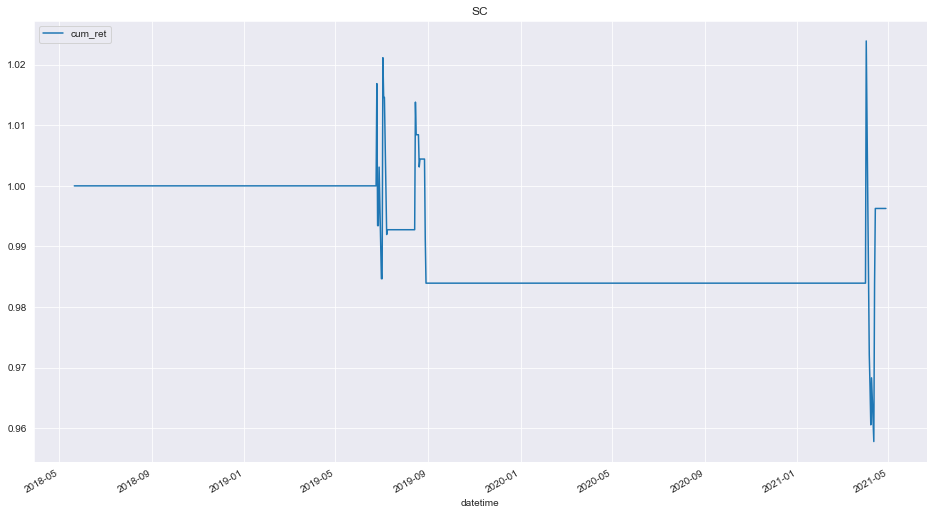

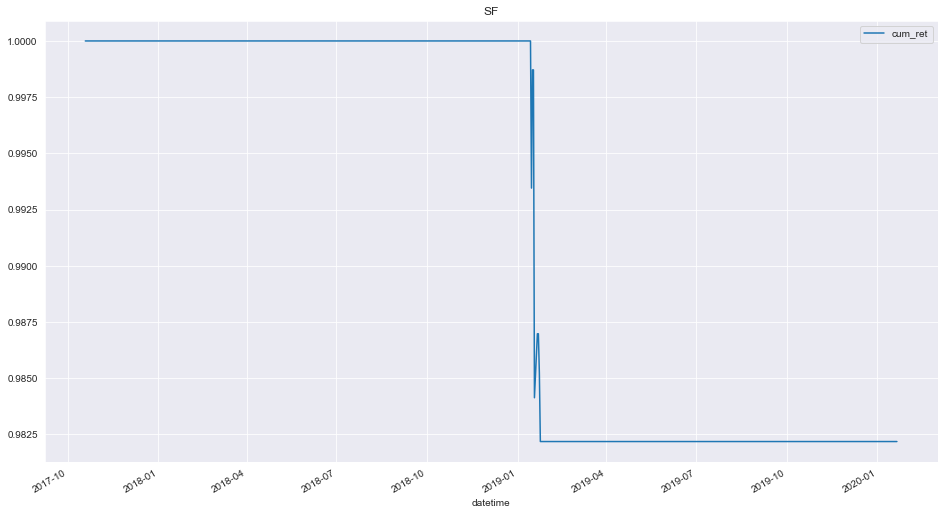

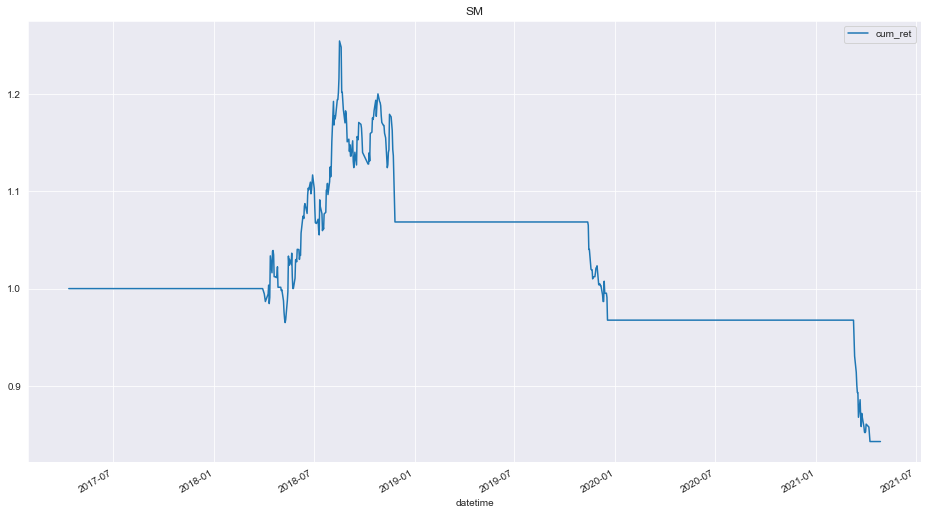

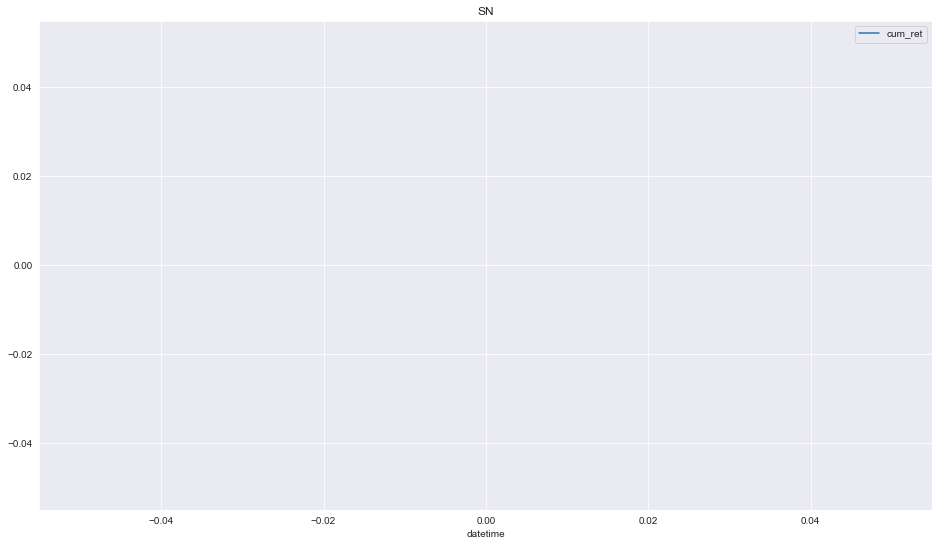

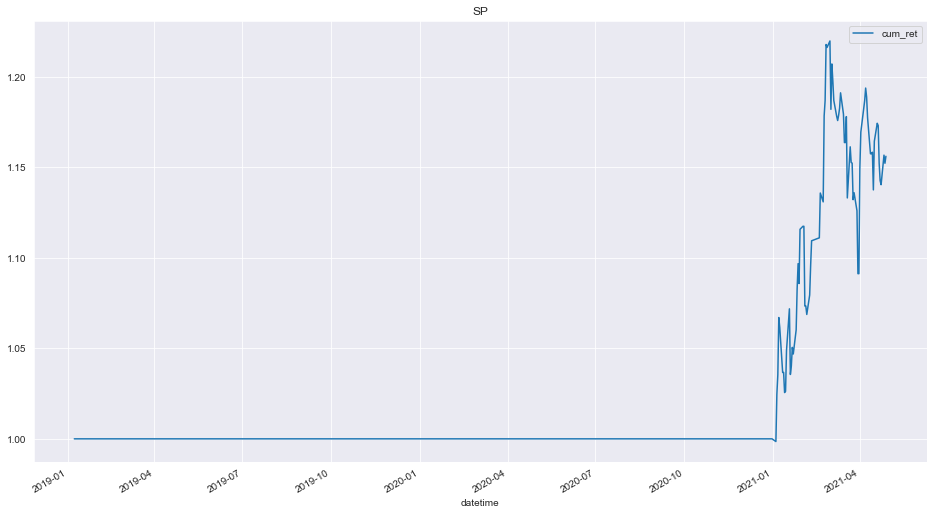

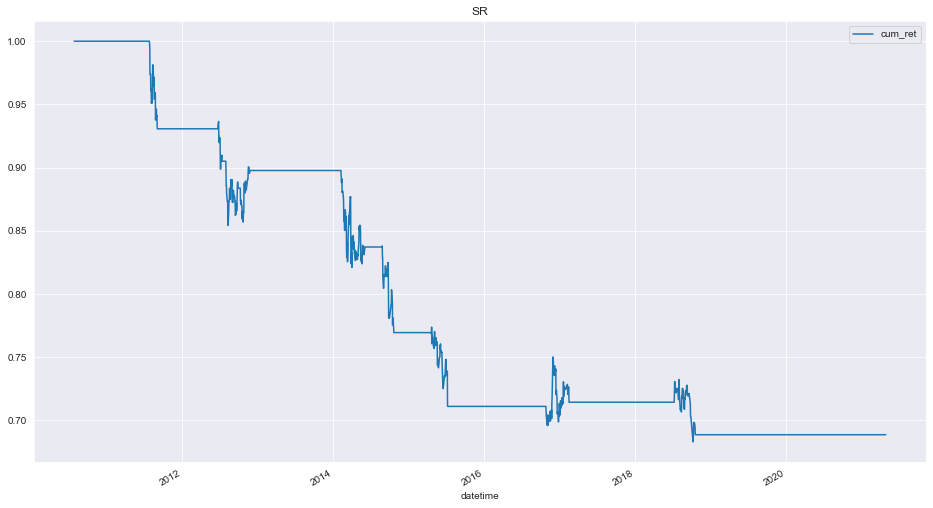

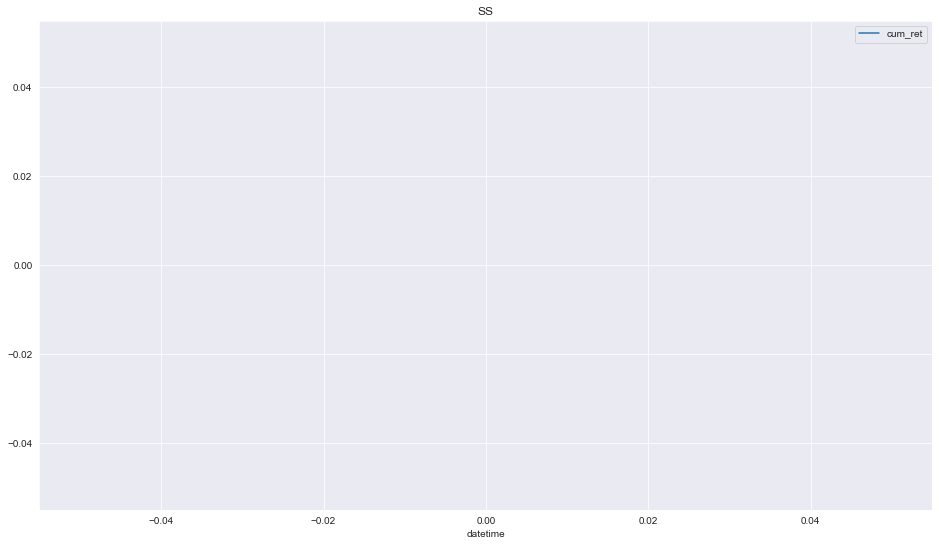

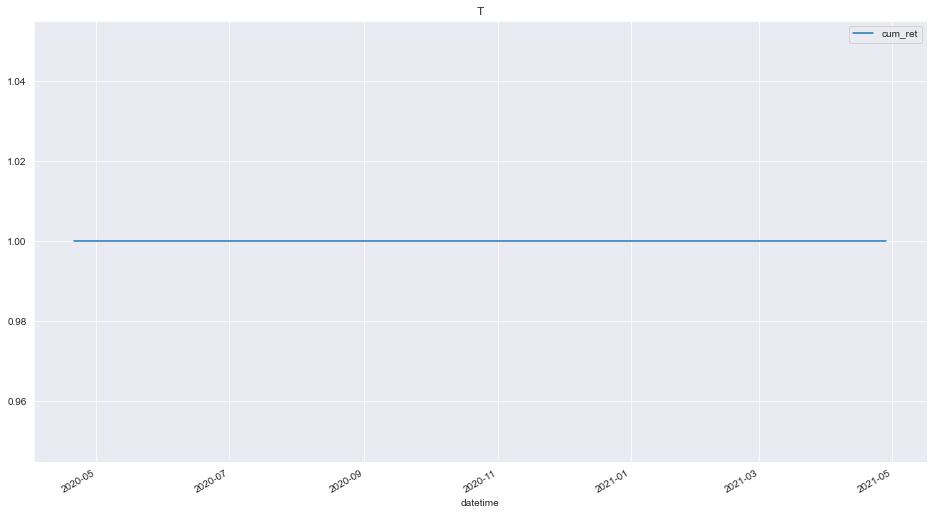

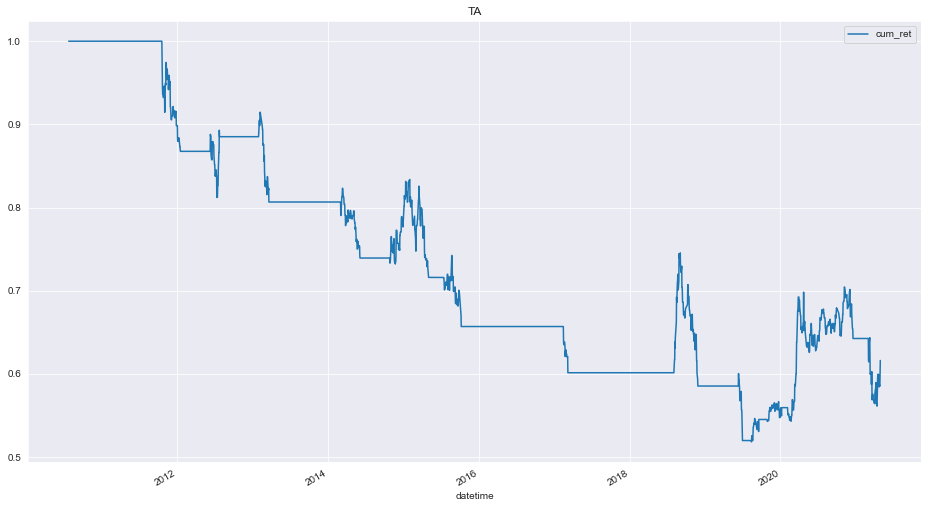

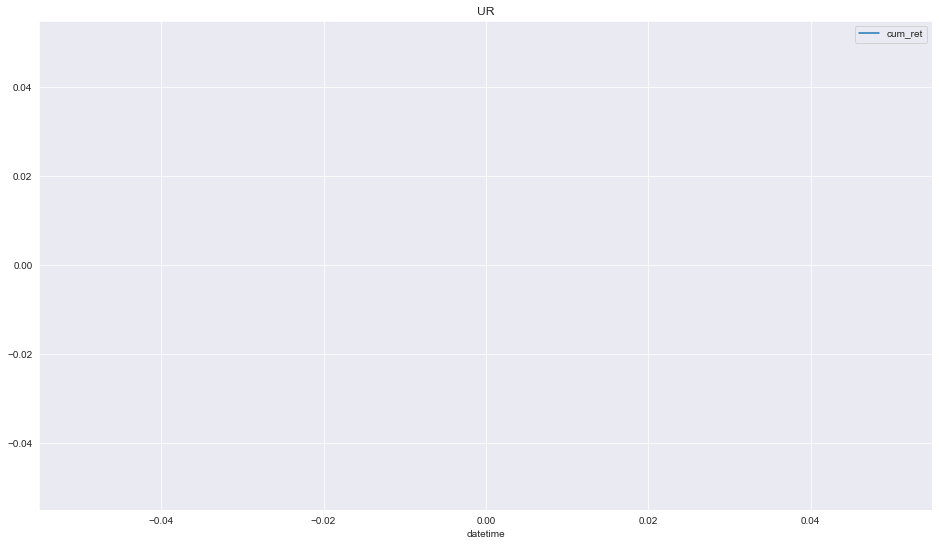

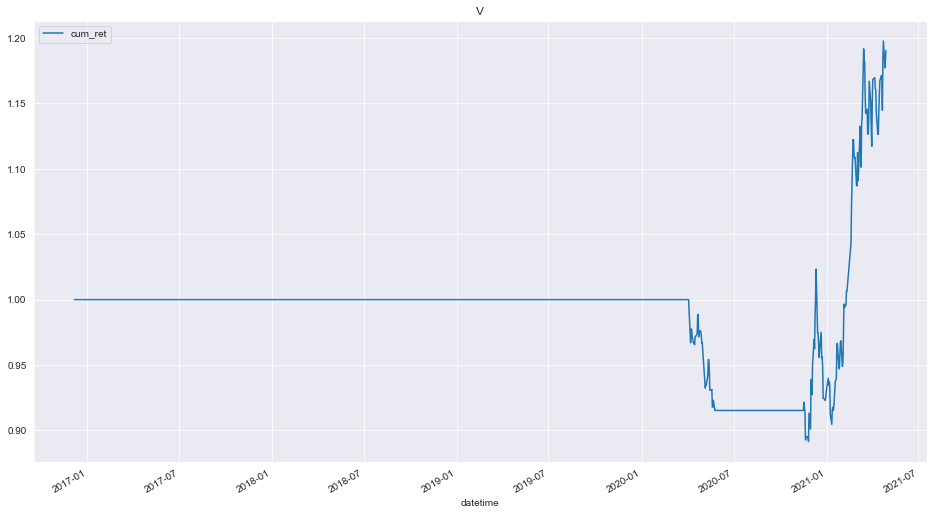

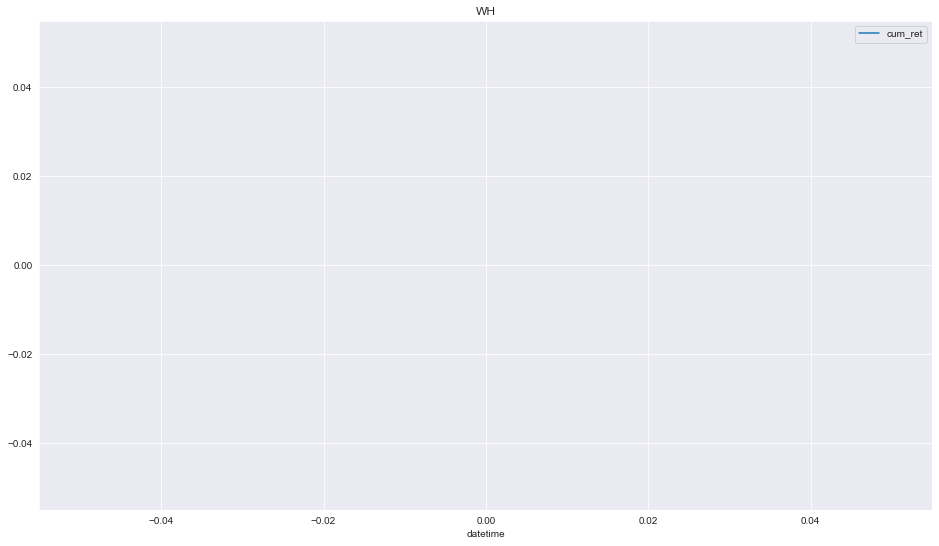

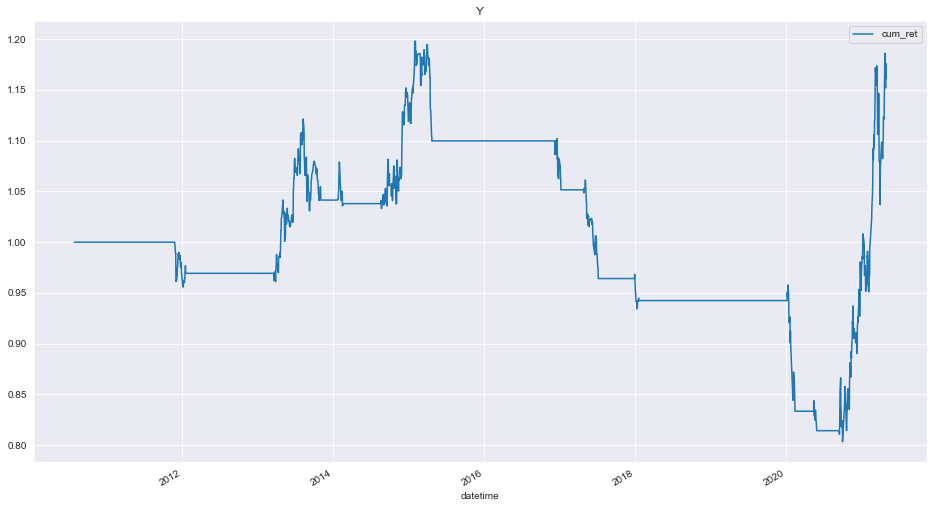

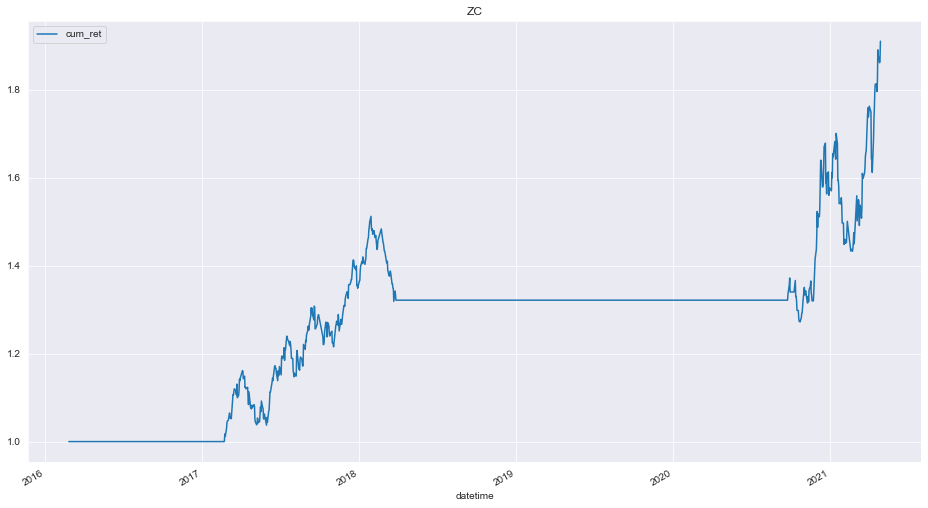

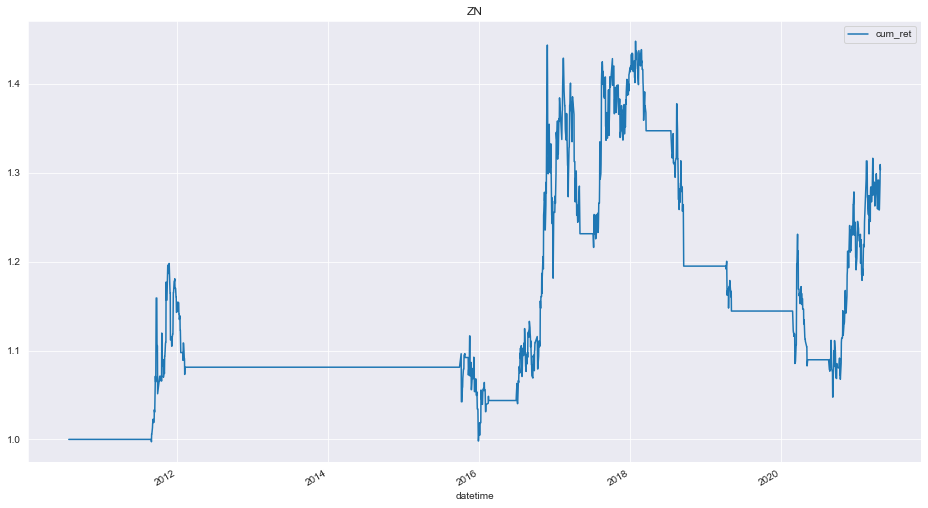

In [3]:
for c in C_DAILY:
    cursord = query(db_name=DB, col='daily', category=c, break_in=break_in, use_real_price=False)
    cum_retd = avg_cum_ret_from_cursor(cursord)
    cum_retd.plot(title=c, figsize=(16, 9))

In [5]:
all_performances = defaultdict(list)

for c in C_DAILY:
    for break_in in break_in_rng:
        cursor = query(db_name=DB, col='daily', category=c, break_in=break_in, use_real_price=False)
        cum_ret = avg_cum_ret_from_cursor(cursor)
        all_performances[c].append(cum_ret)

In [9]:
best_performance = dict()
for c , cr_list in all_performances.items():
    long_enough_crs = [cr for cr in cr_list if len(cr) > 200]
    if long_enough_crs:
        best_performance[c] = max(map(avg_annual_ret, long_enough_crs))

best_performance = OrderedDict(sorted(best_performance.items(),key=lambda it: it[1], reverse=True))

<BarContainer object of 42 artists>

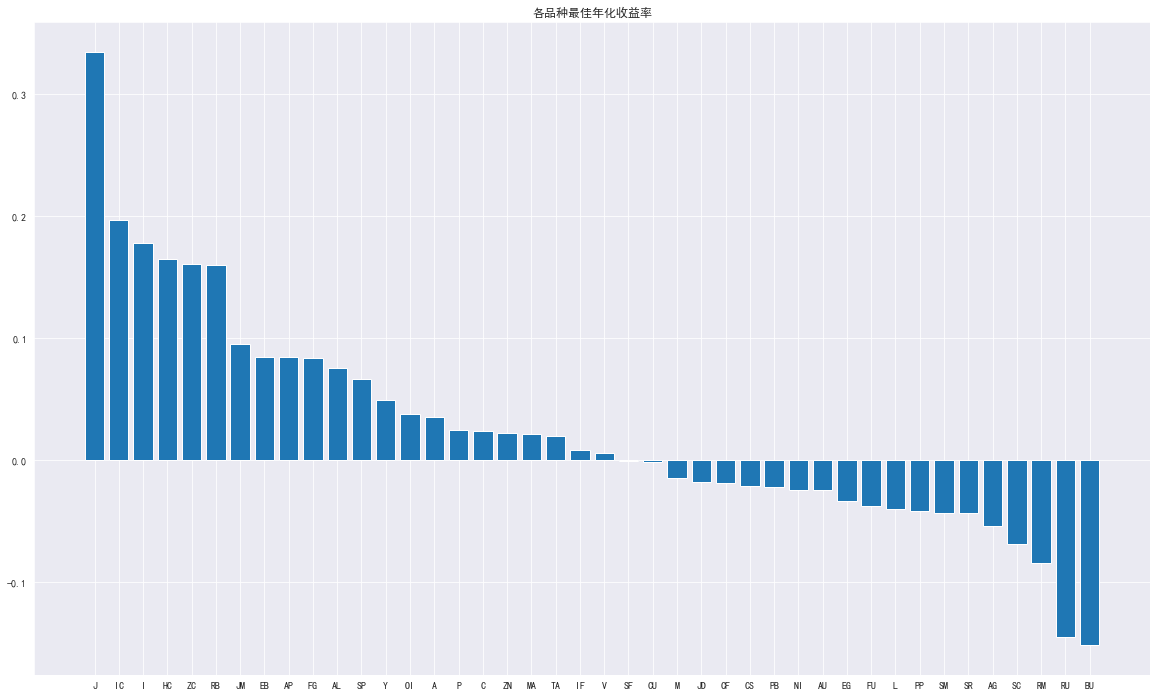

In [14]:
fig = plt.figure(figsize=(20, 12))
plt.title('各品种最佳年化收益率')
plt.bar(best_performances.keys(), best_performances.values())